In [1]:
import pandas as pd

In [2]:
metadata_df = pd.read_csv('ham_dataset/HAM10000_metadata.csv')
metadata_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
new_samples_df = pd.read_csv('bigger_choosen_sample.csv')
new_samples_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0004535,ISIC_0024364,nv,follow_up,45.0,male,upper extremity
1,HAM_0004675,ISIC_0031411,nv,histo,55.0,female,lower extremity
2,HAM_0004311,ISIC_0029037,nv,follow_up,35.0,female,trunk
3,HAM_0004625,ISIC_0029346,nv,follow_up,40.0,male,upper extremity
4,HAM_0006689,ISIC_0024493,nv,follow_up,40.0,male,lower extremity
...,...,...,...,...,...,...,...
1887,HAM_0007569,ISIC_0025373,df,consensus,35.0,female,lower extremity
1888,HAM_0001841,ISIC_0025771,df,consensus,35.0,female,lower extremity
1889,HAM_0006707,ISIC_0030870,df,consensus,45.0,female,lower extremity
1890,HAM_0002153,ISIC_0029297,df,consensus,40.0,female,lower extremity


In [ ]:
list(new_samples_df[new_samples_df['dx'] == 'mel']['image_id'])

In [15]:
case_codes = ['nv', 'bkl', 'mel', 'bcc']
samples_to_select = 50

df_to_concat = []

for case_code in case_codes:
    choosen_list = list(new_samples_df[new_samples_df['dx'] == case_code]['image_id'])
    case_metadata = metadata_df[metadata_df['dx'] == case_code]
    case_metadata_without_choosen = case_metadata[~case_metadata['image_id'].isin(choosen_list)]
    sample_case_df = case_metadata_without_choosen.sample(samples_to_select)
    
    df_to_concat.append(sample_case_df)
    
case_codes = ['akiec', 'vasc', 'df']
for case_code in case_codes:
    case_metadata = metadata_df[metadata_df['dx'] == case_code]
    sample_case_df = case_metadata.sample(samples_to_select)
    
    df_to_concat.append(sample_case_df)
    
test_samples_df = pd.concat(df_to_concat)
test_samples_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
5588,HAM_0004451,ISIC_0027992,nv,follow_up,55.0,female,trunk
5620,HAM_0003975,ISIC_0030098,nv,follow_up,40.0,female,lower extremity
5510,HAM_0006113,ISIC_0031696,nv,follow_up,35.0,female,genital
5000,HAM_0004631,ISIC_0032473,nv,follow_up,55.0,female,trunk
8951,HAM_0000204,ISIC_0027639,nv,histo,55.0,male,back
...,...,...,...,...,...,...,...
1109,HAM_0005518,ISIC_0032410,df,histo,30.0,male,lower extremity
1160,HAM_0002450,ISIC_0024396,df,consensus,65.0,female,lower extremity
1176,HAM_0003597,ISIC_0027488,df,consensus,45.0,male,lower extremity
1207,HAM_0006707,ISIC_0030870,df,consensus,45.0,female,lower extremity


In [16]:
test_samples_df['dx'].value_counts()

nv       50
bkl      50
mel      50
bcc      50
akiec    50
vasc     50
df       50
Name: dx, dtype: int64

In [17]:
test_samples_df.to_csv('test_sample.csv', index=False)

In [ ]:
import os
import shutil

source_dirs = ['ham_dataset/HAM10000_images_part_1', 'ham_dataset/HAM10000_images_part_2']
destination_dir_base = 'test_ham_sample'

for index, row in test_samples_df.iterrows():    
    for source_dir in source_dirs:
        file_name = f"{row['image_id']}.jpg"
        destination_dir = f"{destination_dir_base}/{row['dx']}"

        if os.path.exists(os.path.join(source_dir, file_name)):
            if not os.path.exists(destination_dir):
                os.makedirs(destination_dir)

            shutil.copy(os.path.join(source_dir, file_name), os.path.join(destination_dir, file_name))
            print(f"File '{file_name}' copied to '{destination_dir}'.")

In [19]:
metadata_df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [20]:
import matplotlib.pyplot as plt

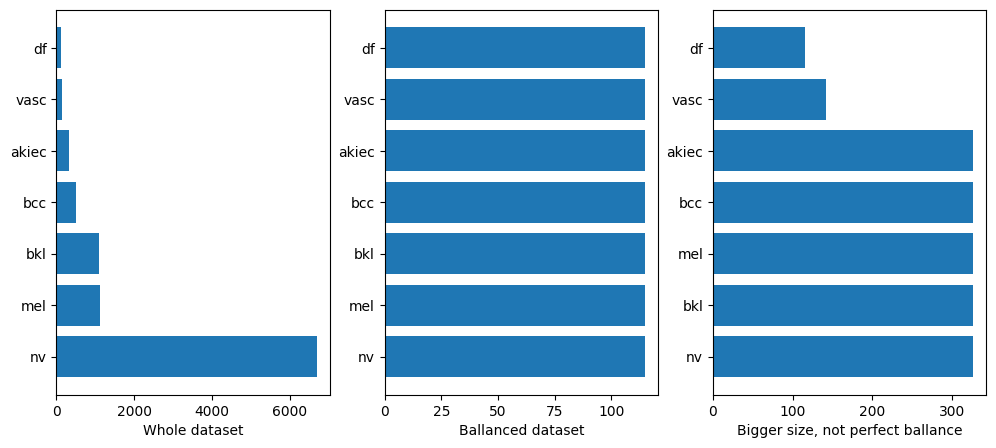

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

value_counts = metadata_df['dx'].value_counts()
axs[0].barh(value_counts.index, value_counts.values)
axs[0].set_xlabel('Whole dataset')

axs[1].barh(value_counts.index, [115 for _ in range(7)])
axs[1].set_xlabel('Ballanced dataset')

value_counts = new_samples_df['dx'].value_counts()
axs[2].barh(value_counts.index, value_counts.values)
axs[2].set_xlabel('Bigger size, not perfect ballance')

plt.show()